In [ ]:
pip install spacy nltk pdfminer.six docx2txt fuzzywuzzy python-Levenshtein scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.7 MB/s eta 0:00:00


In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
pip install pandas scikit-learn nltk

In [ ]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = {
    'Job Title': ['Data Scientist', 'Software Engineer', 'Web Developer', 'Machine Learning Engineer'],
    'Job Description': [
        'Looking for a data scientist with Python, statistics, and machine learning experience.',
        'Experienced software engineer required with C++, Java, and system design expertise.',
        'Frontend web developer skilled in HTML, CSS, JavaScript, and responsive design.',
        'ML engineer with deep learning, TensorFlow, NLP, and big data experience preferred.'
    ]
}

jobs_df = pd.DataFrame(data)
jobs_df

,Job Title,Job Description
0,Data Scientist,"Looking for a data scientist with Python, stat..."
1,Software Engineer,Experienced software engineer required with C+...
2,Web Developer,"Frontend web developer skilled in HTML, CSS, J..."
3,Machine Learning Engineer,"ML engineer with deep learning, TensorFlow, NL..."


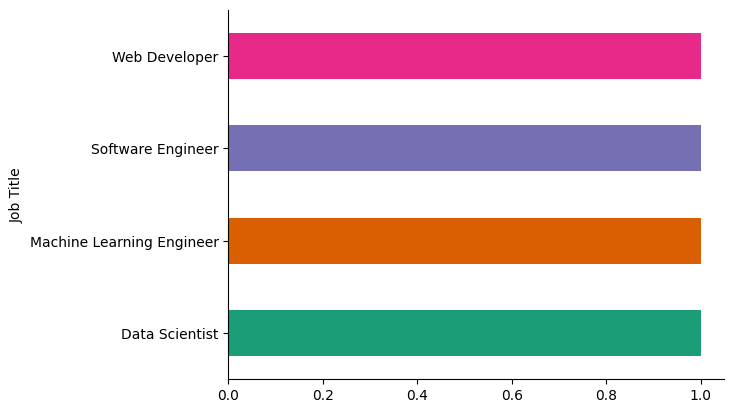

In [ ]:
# @title Job Title

from matplotlib import pyplot as plt
import seaborn as sns
jobs_df.groupby('Job Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
resume_text = """
Experienced computer science graduate with a strong background in Python, TensorFlow, and natural language processing.
Completed projects on sentiment analysis, deep learning, and machine learning pipelines. Proficient in data analysis, model deployment, and cloud technologies.
"""

In [ ]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [ ]:
cleaned_resume = clean_text(resume_text)
jobs_df['Cleaned Description'] = jobs_df['Job Description'].apply(clean_text)

texts = [cleaned_resume] + jobs_df['Cleaned Description'].tolist()

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

resume_vector = tfidf_matrix[0]
job_vectors = tfidf_matrix[1:]
similarities = cosine_similarity(resume_vector, job_vectors).flatten()

In [ ]:
jobs_df['Match Score (%)'] = (similarities * 100).round(2)
recommended_jobs = jobs_df.sort_values(by='Match Score (%)', ascending=False)

recommended_jobs[['Job Title', 'Match Score (%)']]


,Job Title,Match Score (%)
0,Data Scientist,21.26
3,Machine Learning Engineer,18.78
1,Software Engineer,4.80
2,Web Developer,0.00
